Project: Over the past year or so Credit One has seen an increase in the number of customers who have defaulted on loans they have secured from various partners, and Credit One, as their credit scoring service, could risk losing business if the problem is not solved right away. They have enlisted the help of our Data Science team to design and implement a creative, empirically sound solution.
Our Goal is to Develop a model to identify the accounts that could be defaulted. Train and tune three models (random forest, k-nn, and logistic regression) and pick the best one.

In [1]:
import sklearn
print (sklearn.__version__)

0.20.0


In [2]:
#imports
#numpy, pandas, scipy,math, matplotlib
import numpy as np
import pandas as pd
import scipy
import time
import glob
import pickle

from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#import class you plan to use
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold   #For K-fold cross validation  
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
svc = SVC()

In [20]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
del rawData ['ID']
rawData.rename(columns = {'default payment next month':'default'}, inplace=True)
rawData.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [21]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


variableName = dataframe.iloc[rows,columns]
variableName = dataframe['coumnName']
variableName = dataframe.iloc[:,0:4]

In [24]:
# Change the variables that got changed to numerical back to categorical.
rawData['SEX'] = rawData['SEX'].astype('category')
rawData['EDUCATION'] = rawData['EDUCATION'].astype('category')
rawData['MARRIAGE'] = rawData['MARRIAGE'].astype('category')
rawData['PAY_0'] = rawData['PAY_0'].astype('category')
rawData['PAY_2'] = rawData['PAY_2'].astype('category')
rawData['PAY_3'] = rawData['PAY_3'].astype('category')
rawData['PAY_4'] = rawData['PAY_4'].astype('category')
rawData['PAY_5'] = rawData['PAY_5'].astype('category')
rawData['PAY_6'] = rawData['PAY_6'].astype('category')
rawData['default'] = rawData['default'].astype('category')
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null category
EDUCATION    30000 non-null category
MARRIAGE     30000 non-null category
AGE          30000 non-null int64
PAY_0        30000 non-null category
PAY_2        30000 non-null category
PAY_3        30000 non-null category
PAY_4        30000 non-null category
PAY_5        30000 non-null category
PAY_6        30000 non-null category
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null category
dtypes: category(10), int64(14)
memory usage:

In [26]:
#Select the features
#features
features = rawData.iloc[:,1:25]
print('Summary of feature sample')
#features[0:5]
features.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,2,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,2,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,2,2,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,1,2,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [27]:
#dependent variable
depVar = rawData['default']

#print(np.cov(rawData))

In [28]:
print(depVar)

0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       1
23       1
24       0
25       0
26       1
27       0
28       0
29       0
        ..
29970    0
29971    0
29972    0
29973    1
29974    1
29975    0
29976    1
29977    0
29978    0
29979    0
29980    0
29981    0
29982    1
29983    0
29984    0
29985    0
29986    0
29987    0
29988    0
29989    0
29990    0
29991    1
29992    0
29993    0
29994    1
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: category
Categories (2, int64): [0, 1]


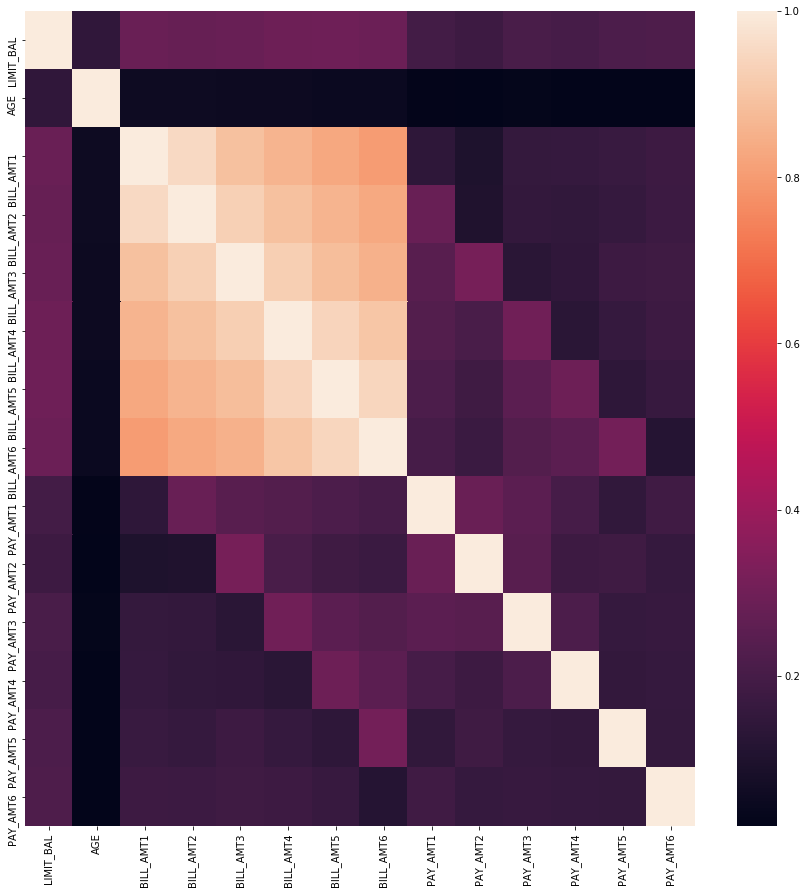

In [29]:
import seaborn as sns
plt.figure(figsize=(15,15)) 
corr = rawData.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

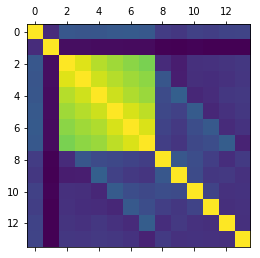

In [30]:
plt.matshow(rawData.corr())

In [31]:
rawData.corr()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.144713,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
AGE,0.144713,1.000000,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
BILL_AMT1,0.285430,0.056239,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
BILL_AMT2,0.278314,0.054283,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256
BILL_AMT3,0.283236,0.053710,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326
BILL_AMT4,0.293988,0.051353,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637
BILL_AMT5,0.295562,0.049345,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184
BILL_AMT6,0.290389,0.047613,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.199965,0.172663,0.233770,0.250237,0.307729,0.115494
PAY_AMT1,0.195236,0.026147,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735
PAY_AMT2,0.178408,0.021785,0.099355,0.100851,0.316936,0.207564,0.181246,0.172663,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634


In [32]:
# See the correlations in descending order
core = rawData.corr() # df is the pandas dataframe
c1 = corr.abs().unstack()
c1.sort_values(ascending = False).drop_duplicates()

PAY_AMT6   PAY_AMT6     1.000000
BILL_AMT2  BILL_AMT1    0.951484
BILL_AMT6  BILL_AMT5    0.946197
BILL_AMT4  BILL_AMT5    0.940134
BILL_AMT2  BILL_AMT3    0.928326
BILL_AMT3  BILL_AMT4    0.923969
BILL_AMT4  BILL_AMT6    0.900941
BILL_AMT2  BILL_AMT4    0.892482
BILL_AMT1  BILL_AMT3    0.892279
BILL_AMT5  BILL_AMT3    0.883910
BILL_AMT4  BILL_AMT1    0.860272
BILL_AMT2  BILL_AMT5    0.859778
BILL_AMT3  BILL_AMT6    0.853320
BILL_AMT6  BILL_AMT2    0.831594
BILL_AMT5  BILL_AMT1    0.829779
BILL_AMT6  BILL_AMT1    0.802650
BILL_AMT3  PAY_AMT2     0.316936
PAY_AMT5   BILL_AMT6    0.307729
BILL_AMT4  PAY_AMT3     0.300023
BILL_AMT5  LIMIT_BAL    0.295562
LIMIT_BAL  BILL_AMT4    0.293988
BILL_AMT5  PAY_AMT4     0.293118
LIMIT_BAL  BILL_AMT6    0.290389
PAY_AMT2   PAY_AMT1     0.285576
LIMIT_BAL  BILL_AMT1    0.285430
BILL_AMT3  LIMIT_BAL    0.283236
BILL_AMT2  PAY_AMT1     0.280365
           LIMIT_BAL    0.278314
BILL_AMT5  PAY_AMT3     0.252305
PAY_AMT1   PAY_AMT3     0.252191
          

In [34]:
#Training Set (Feature Space: X Training)
#X_train = (features[: 100000])
#X_train_count = len(X_train.index)
X_train, X_test, y_train, y_test = train_test_split(rawData.iloc[:, :-1], rawData['default'], test_size = 0.3, random_state = 0)
X_train_count = len(X_train.index)
print('The number of observations in the training set are:',str(X_train_count))
#X_train.head()

The number of observations in the training set are: 21000


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [36]:
X_train.shape, X_test.shape

((15750, 23), (5250, 23))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((11812, 23), (3938, 23))

# Build Models

In [38]:
#import class you plan to use
from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors = 1)
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold   #For K-fold cross validation  
from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(random_state = 0)
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

#Models
modelKNN = KNeighborsClassifier()
modelLOG = LogisticRegression()
modelRF = RandomForestClassifier()

In [39]:
from sklearn.model_selection import cross_val_score

In [42]:
#Models
modelSVC = SVC()
modelRF = RandomForestClassifier()
modelLR = LogisticRegression()
modelKNN = KNeighborsClassifier()

In [43]:
model = LogisticRegression(n_jobs=10)

In [44]:
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.79735907 0.79964449 0.80259146]


0.9774805282763291

In [45]:
modelSVC.fit(X_train,y_train)
print(cross_val_score(modelSVC, X_train, y_train)) 
modelSVC.score(X_train,y_train)

/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.p

[0.77805993 0.77679025 0.77794715]


0.9951743989163563

In [46]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sk

[0.77907567 0.77882174 0.77896341]


0.7790382661699966

In [47]:
modelKNN.fit(X_train,y_train)
print(cross_val_score(modelKNN, X_train, y_train)) 
modelKNN.score(X_train,y_train)

/Users/Vijendhar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.74276282 0.75418994 0.74822154]


0.8173044361666102

# Fit Models

# Model Fitting

In [48]:
 # Random Forest Model Fitting and Scoring
#Model Fitting
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[0.80192991 0.80218385 0.79954268]


0.979004402302743

In [49]:
#Linear Regression Model Fitting and Scoring
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[0.77907567 0.77882174 0.77896341]


0.7791229258381307

In [50]:
# Model fitting - SVC
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
modelSVC.fit(X_train, y_train)
print(cross_val_score(modelSVC, X_train, y_train))
modelSVC.score(X_train, y_train)

[0.77805993 0.77679025 0.77794715]


0.9951743989163563

In [51]:
# Model fitting - KNN
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
modelKNN.fit(X_train, y_train)
print(cross_val_score(modelKNN, X_train, y_train))
modelKNN.score(X_train, y_train)

[0.74276282 0.75418994 0.74822154]


0.8173044361666102

# Predictions

# Random Forest

In [52]:
#Make Predictions RF
predictionsRF = modelRF.predict(X_test)
predRsquaredRF = r2_score(y_test,predictionsRF)
rmseRF = sqrt(mean_squared_error(y_test, predictionsRF))
print('R Squared: %.3f' % predRsquaredRF)
print('RMSE: %.3f' % rmseRF)

R Squared: -0.157
RMSE: 0.445


In [53]:
#Make Predictions
predictions = modelRF.predict(X_test)
predAccuracy = accuracy_score(y_test,predictions)
print('Accuracy: %.3f' % predAccuracy)

Accuracy: 0.802


In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# Make predictions - RF
predictionsRF = modelRF.predict(X_test)
predAccuracyRF = accuracy_score(y_test, predictionsRF)
print(classification_report(y_test, predictionsRF))
print('Random Forest Metrics:')
print('Accurancy: %.3f' % predAccuracyRF)

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      3074
           1       0.60      0.29      0.39       864

   micro avg       0.80      0.80      0.80      3938
   macro avg       0.71      0.62      0.64      3938
weighted avg       0.78      0.80      0.77      3938

Random Forest Metrics:
Accurancy: 0.802


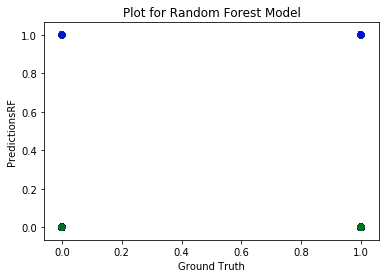

In [55]:
plt.scatter(y_test, predictionsRF, color=['blue','green'], alpha = 0.5)
plt.title('Plot for Random Forest Model')
plt.xlabel('Ground Truth')
plt.ylabel('PredictionsRF')
plt.show();

# SVC

In [56]:
#Make Predictions SVC
predictionsSVC = modelSVC.predict(X_test)
predRsquaredSVC = r2_score(y_test,predictionsSVC)
rmseSVC = sqrt(mean_squared_error(y_test, predictionsSVC))
print('R Squared: %.3f' % predRsquaredSVC)
print('RMSE: %.3f' % rmseSVC)

R Squared: -0.283
RMSE: 0.469


In [57]:
# Make predictions - SVC
predictionsSVC = modelSVC.predict(X_test)
predAccuracySVC = accuracy_score(y_test, predictionsSVC)
print(classification_report(y_test, predictionsSVC))
print('SVC Metrics:')
print('Accuracy: %.3f' % predAccuracySVC)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      3074
           1       0.47      0.01      0.02       864

   micro avg       0.78      0.78      0.78      3938
   macro avg       0.62      0.50      0.45      3938
weighted avg       0.71      0.78      0.69      3938

SVC Metrics:
Accuracy: 0.780


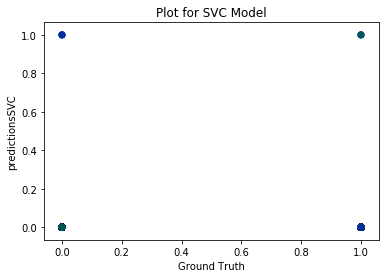

In [58]:
plt.scatter(y_test, predictionsSVC, color=['blue','green'], alpha = 0.5)
plt.title('Plot for SVC Model')
plt.xlabel('Ground Truth')
plt.ylabel('predictionsSVC')
plt.show();

# KNN

In [59]:
#Make Predictions KNN
predictionsKNN = modelKNN.predict(X_test)
predRsquaredKNN = r2_score(y_test,predictionsKNN)
rmseKNN = sqrt(mean_squared_error(y_test, predictionsKNN))
print('R Squared: %.3f' % predRsquaredKNN)
print('RMSE: %.3f' % rmseKNN)

R Squared: -0.459
RMSE: 0.500


In [60]:
# Make predictions - KNN
predictionsKNN = modelKNN.predict(X_test)
predAccuracyKNN = accuracy_score(y_test, predictionsKNN)
print(classification_report(y_test, predictionsKNN))
print('KNN Metrics:')
print('Accuracy: %.3f' % predAccuracyKNN)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      3074
           1       0.36      0.19      0.25       864

   micro avg       0.75      0.75      0.75      3938
   macro avg       0.58      0.55      0.55      3938
weighted avg       0.70      0.75      0.72      3938

KNN Metrics:
Accuracy: 0.750


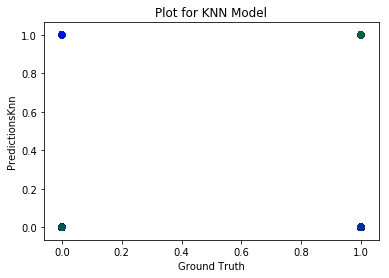

In [61]:
plt.scatter(y_test, predictionsKNN, color=['blue','green'], alpha = 0.5)
plt.title('Plot for KNN Model')
plt.xlabel('Ground Truth')
plt.ylabel('PredictionsKnn')
plt.show();

# LR

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [62]:
#Make Predictions LR
predictionsLR = modelLR.predict(X_test)
predRsquaredLR = r2_score(y_test,predictionsLR)
rmseLR = sqrt(mean_squared_error(y_test, predictionsLR))
print('R Squared: %.3f' % predRsquaredLR)
print('RMSE: %.3f' % rmseLR)

R Squared: -0.283
RMSE: 0.469


In [63]:
# Make predictions - LR
predictionsLR = modelKNN.predict(X_test)
predAccuracyLR = accuracy_score(y_test, predictionsLR)
print(classification_report(y_test, predictionsLR))
print('LR Metrics:')
print('Accuracy: %.3f' % predAccuracyLR)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      3074
           1       0.36      0.19      0.25       864

   micro avg       0.75      0.75      0.75      3938
   macro avg       0.58      0.55      0.55      3938
weighted avg       0.70      0.75      0.72      3938

LR Metrics:
Accuracy: 0.750


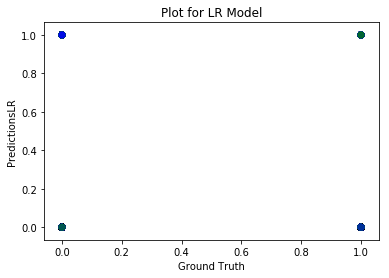

In [64]:
plt.scatter(y_test, predictionsLR, color=['blue','green'], alpha = 0.5)
plt.title('Plot for LR Model')
plt.xlabel('Ground Truth')
plt.ylabel('PredictionsLR')
plt.show();